### Content
Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

#### The data set includes information about:
Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

### Variables

 customerID - Customer ID
 
 gender - male or a female

 SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
 
 Partner - Whether the customer has a partner or not (Yes, No)
 
 Dependents - Whether the customer has dependents or not (Yes, No)
 
 tenure - Number of months the customer has stayed with the company
 
 PhoneService - Whether the customer has a phone service or not (Yes, No)
 
 MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
 
 InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
 
 OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
 
 OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
 
 DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
 
 TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
 
 StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
 
 StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
 
 Contract - The contract term of the customer (Month-to-month, One year, Two year)
 
 PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
 
 PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit    card (automatic))
 
 MonthlyCharges - The amount charged to the customer monthly
 
 TotalCharges - The total amount charged to the customer
 
 Churn - Whether the customer churned or not (Yes or No)
 
#### References:  https://www.kaggle.com/blastchar/telco-customer-churn


### Objective

Performing multiple classification algorithms on the churn dataset and choosing the best classification model that predicts the churn customers from other customers 

### Good Evaluation Strategies:

We use validation strategies for 3 broad objectives:

Algorithm selection: Selecting the class of models which is best-suited for the data at hand (tree-based models vs neural networks vs linear models)

Hyperparameter tuning: Tuning the hyperparameters of a model to increase this predictive power

Measure of generalizability: Computing an unbiased estimate of the predictive power of the model

We refer to the 3rd objective as model evaluation. The first 2 objectives comes under the task of model selection. 

Initially we selected model such as KNN, Decision Tree, Logistic Regression, Support Vector Classification as our models. We used GridSearchCV to find the best hyperparameters for above models and selected the best models based on the accuracy score 

In [1]:
#Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pylab as pl
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
import os
os.getcwd()


'/Users/Megha/Documents/Sem-3/ML'

In [2]:
# Reading CSV file
data = pd.read_csv('churn.csv', sep=',')
print(type(data))
data.head(5)

<class 'pandas.core.frame.DataFrame'>


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.isna().sum()

customerID             3
gender                 3
SeniorCitizen        225
Partner                3
Dependents             3
tenure                 3
PhoneService           3
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling    3134
PaymentMethod       3987
MonthlyCharges         3
TotalCharges           3
Churn                  3
dtype: int64

In [4]:
data.shape

(7046, 21)

### Data Cleaning and Manipulation

In [5]:
#dropping PaperLessBilling & PaymentMethod columns as there is almost  50% of data missing in both of these columns
data=data.drop(columns=['PaperlessBilling','PaymentMethod'])
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [6]:
# Replacing missing values in SeniorCitizen variable with its mode value
data['SeniorCitizen']= data['SeniorCitizen'].fillna(data['SeniorCitizen'].mode()[0])

In [7]:
#Dropping the remaining rows with null values
data=data.dropna()

In [8]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Transformations

In [9]:
encode = LabelEncoder()
encode.fit(['Male','Female'])
data['gender'] = encode.transform(data['gender'])

encode.fit(['No','Yes'])
data['Partner'] = encode.transform(data['Partner'])

encode.fit(['No','Yes'])
data['Dependents'] = encode.transform(data['Dependents'])

encode.fit(['No','Yes'])
data['PhoneService'] = encode.transform(data['PhoneService'])

encode.fit(['No','No phone service','Yes'])
data['MultipleLines'] = encode.transform(data['MultipleLines'])

encode.fit(['DSL','Fiber optic','No'])
data['InternetService'] = encode.transform(data['InternetService'])

encode.fit(['No','No internet service','Yes'])
data['OnlineSecurity'] = encode.transform(data['OnlineSecurity'])

encode.fit(['No','No internet service','Yes'])
data['OnlineBackup'] = encode.transform(data['OnlineBackup'])
encode.fit(['No','No internet service','Yes'])
data['DeviceProtection'] = encode.transform(data['DeviceProtection'])

encode.fit(['No','No internet service','Yes'])
data['TechSupport'] = encode.transform(data['TechSupport'])

encode.fit(['No','No internet service','Yes'])
data['StreamingTV'] = encode.transform(data['StreamingTV'])

encode.fit(['No','No internet service','Yes'])
data['StreamingMovies'] = encode.transform(data['StreamingMovies'])

encode.fit(['Month-to-month','One year','Two year'])
data['Contract'] = encode.transform(data['Contract'])

encode.fit(['No','Yes'])
data['Churn'] = encode.transform(data['Churn'])


In [10]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,29.85,29.85,0
1,5575-GNVDE,1,0.0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,56.95,1889.5,0
2,3668-QPYBK,1,0.0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,53.85,108.15,1
3,7795-CFOCW,1,0.0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,42.30,1840.75,0
4,9237-HQITU,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1


In [11]:
data.dtypes

customerID           object
gender                int64
SeniorCitizen       float64
Partner               int64
Dependents            int64
tenure              float64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [12]:
#Changing TotalCharges column to numeric column
data['TotalCharges'] = data['TotalCharges'].apply(pd.to_numeric, errors='coerce')
data.dtypes

customerID           object
gender                int64
SeniorCitizen       float64
Partner               int64
Dependents            int64
tenure              float64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [13]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
data=data.dropna()

In [15]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Exploratory Data Analysis

Text(0.5, 1.0, '# of Customers by their tenure')

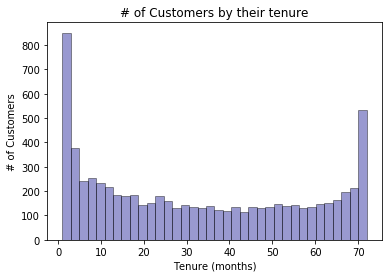

In [16]:
#From the below graph we can see that a lot of customers have been with the telecom company for just a month, 
#while quite a many are there for about 72 months.

ax = sns.distplot(data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

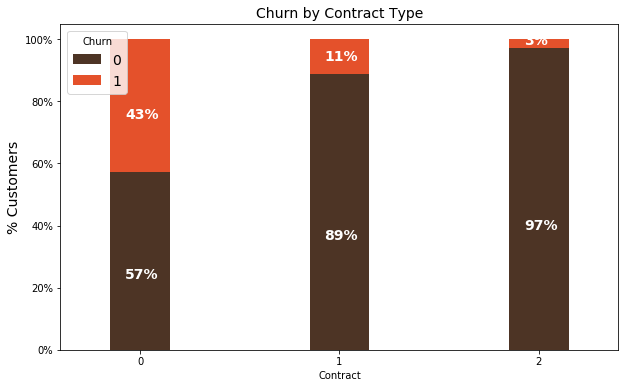

In [17]:
#Below plot shows occurance of churn across different contract types

colors = ['#4D3425','#E4512B']
contract_churn = data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

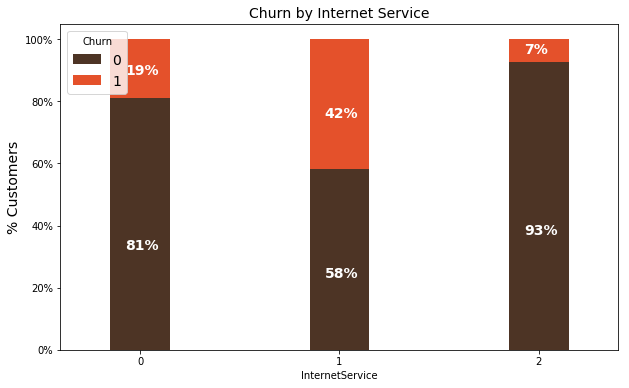

In [18]:
#Below plot shows occurance of churn across different contract types

colors = ['#4D3425','#E4512B']
contract_churn = data.groupby(['InternetService','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Internet Service',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Text(0.5, 1.0, '% of Senior Citizens')

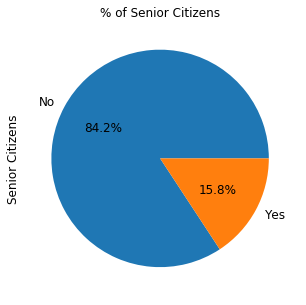

In [19]:
#The below pie chart is used to display that 16.1% of the customers are senior citizens

ax = (data['SeniorCitizen'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

## Classification 

In [20]:
#Using the columns required for running the classification algorithms

data=data.drop(columns=['customerID','gender'])
#, 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies'

In [21]:
#Labels and featureSet columns
columns = data.columns.tolist()
columns = [c for c in columns if c not in ['Churn']]
target = 'Churn'

X = data[columns]
y = data[target]

In [22]:
#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Training FeatureSet:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing FeatureSet:", X_test.shape)
print("Testing Labels:", y_test.shape)

Training FeatureSet: (5274, 16)
Training Labels: (5274,)
Testing FeatureSet: (1758, 16)
Testing Labels: (1758,)


### KNN classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

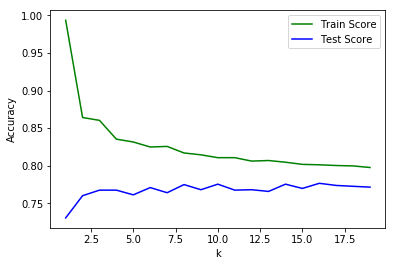

In [24]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [25]:
from sklearn import neighbors

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
n=model.best_params_['n_neighbors']
print("Best n_neighbors:",n)

Best n_neighbors: 8


In [26]:
knn = KNeighborsClassifier(n_neighbors=n)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [27]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Train Score:",knn.score(X_train, y_train)*100)
print("Test Score:",metrics.accuracy_score(y_test, y_pred)*100)

Train Score: 81.68373151308305
Test Score: 77.47440273037543


### Logistic Regression

In [28]:
# GridSearch to find best parameters
logreg=LogisticRegression()
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.7999620781190747


In [29]:
# Running logistic regression with the best parameters occured above
log_l1 = LogisticRegression(penalty = 'l2', C = 1.0)
log_l1.fit(X_train, y_train)
print("Train Score:",log_l1.score(X_train, y_train))
print("Test Score:",log_l1.score(X_test, y_test))

Train Score: 0.8026166097838453
Test Score: 0.7946530147895335


### Decision Tree

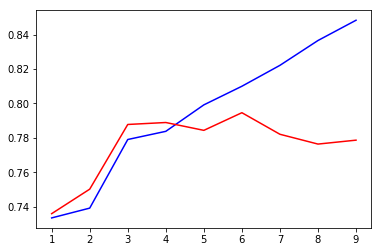

In [30]:
from sklearn.tree import DecisionTreeClassifier
depth =  list(range(1, 10))
train_score = []
test_score = []

for i in depth:
    dtree = DecisionTreeClassifier(random_state=0,max_depth=i)
    dtree.fit(X_train,y_train)
    train_score.append(dtree.score(X_train,y_train))
    test_score.append(dtree.score(X_test,y_test))

plt.plot(depth,train_score,'b')
plt.plot(depth,test_score,'r')

In [31]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV


sample_max_depth = list(range(1, 10))
dt= DecisionTreeClassifier()
param_grid = dict(max_depth=sample_max_depth)

# instantiate the grid
grid = GridSearchCV(dt, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [32]:

# Single best score achieved across all params (sample_max_depth)
print(grid.best_score_)

# Dictionary containing the parameters (sample_max_depth) used to generate that score
n=grid.best_params_['max_depth']
print("max_depth: ",n)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.7866894197952219
max_depth:  5
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [33]:
dt = DecisionTreeClassifier(criterion = "entropy",max_depth = n)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict the response for test dataset
pred_dt = dt.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of train data:",dt.score(X_train, y_train))
print("Accuracy of test data:",metrics.accuracy_score(y_test, pred_dt))

Accuracy of train data: 0.8029958285930983
Accuracy of test data: 0.79806598407281


### SVC Linear Kernel

In [34]:
#Simple SVC algorithm using linear 
svc_linearKernel = SVC(kernel='linear', degree=3)  
svc_linearKernel.fit(X_train, y_train) 
pred_linearKernel = svc_linearKernel.predict(X_test)
print("SVC Kernel poly Accuracy:",round(metrics.accuracy_score(y_test, pred_linearKernel),2)*100)

SVC Kernel poly Accuracy: 79.0


### SVC Polynomial Kernel

In [35]:
#Running SVC model using kernel = 'Polynomial'
from sklearn.svm import SVC  
svc_poly = SVC(kernel='poly', degree=3)  
svc_poly.fit(X_train, y_train) 
pred_poly = svc_poly.predict(X_test) 
print("SVC Kernel poly Accuracy:",round(metrics.accuracy_score(y_test, pred_poly),2)*100)

SVC Kernel poly Accuracy: 75.0


### SVC RBF kernel

In [36]:
#Running SVC model using kernel = 'guassian(rbf)'
svc_rbf = SVC(kernel='rbf',degree=3)  
svc_rbf.fit(X_train, y_train) 
pred_rbf = svc_rbf.predict(X_test)
print("SVC Kernel poly Accuracy:",round(metrics.accuracy_score(y_test, pred_rbf),2)*100)

SVC Kernel poly Accuracy: 80.0


### Grid Search on SVC model

In [37]:
model = SVC()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [38]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [39]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

In [40]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.2s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.2s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.4s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.5s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.5s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.3s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.8s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   1.6s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   1.9s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   1.9s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:  3.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [41]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [42]:
c=grid.best_params_['C']
g=grid.best_params_['gamma']
k=grid.best_params_['kernel']

In [43]:
predic = grid.predict(X_test)

In [44]:
#Using the best parameters in SVC

svc = SVC(kernel=k , C=c, gamma=g)  
svc.fit(X_train, y_train) 
pred_svc= svc_rbf.predict(X_test)
print("SVC Train Accuracy:",round(svc.score(X_train, y_train),2)*100)
print("SVC Test Accuracy:",round(metrics.accuracy_score(y_test, pred_svc),2)*100)

SVC Train Accuracy: 80.0
SVC Test Accuracy: 80.0


### Bagging using KNN

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

#Bagging using KNN algorithm
#When we run bagging classifier using Knn algorithm, we get Train score as 0.83 and Test score as 0.773. 
#These train and test scores have good amount of difference between them.

bagging_clf_knn = BaggingClassifier(knn, bootstrap = True, n_estimators=100,oob_score=True,random_state=101)
bagging_clf_knn.fit(X_train,y_train)
print('Train score: {0:0.4f}'.format(bagging_clf_knn.score(X_train, y_train)))
print('Test score: {0:0.4f}'.format(bagging_clf_knn.score(X_test, y_test)))

Train score: 0.8244
Test score: 0.7742


### Pasting using KNN

In [48]:

#knn classifier
#When we perform pasting on Knn Classfier,  we get a train score of 0.8168 and test score of 0.7747
#We can see almost 4% difference in train and test score. 
#To give more accurate results we us Cross validation on tis pasting classifier which returns 0.77 accuracy


from sklearn.model_selection import cross_val_score
bagging_clf_knn = BaggingClassifier(knn, bootstrap = False, n_estimators=100,random_state=101)
print('Cross validation score: {0:0.4f}'.format(cross_val_score(bagging_clf_knn,X_train,y_train,cv=8).mean()))
bagging_clf_knn.fit(X_train,y_train)
print('Train score: {0:0.4f}'.format(bagging_clf_knn.score(X_train, y_train)))
print('Test score: {0:0.4f}'.format(bagging_clf_knn.score(X_test, y_test)))

Cross validation score: 0.7696
Train score: 0.8168
Test score: 0.7747


### ADABoosting

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

#Here we perform Adaboosting on logistic regression. We use grid search method to find the best parameters 
#We perform the AdaBoosting classification on test data using the best classifiers to get accurate results
#we notice very little difference between train and test scores.

adaboost_clf_logreg = AdaBoostClassifier(base_estimator = log_l1,random_state=101)
param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [100,200]}
grid_search = GridSearchCV(adaboost_clf_logreg, param_grid, cv = 8,return_train_score=True)
grid_search.fit(X_train, y_train)
print('best learning_rate: {}'.format(grid_search.best_params_['learning_rate']))
print('best n_estimators: {}'.format(grid_search.best_params_['n_estimators']))
print('best train-set score : {0:0.4f}'.format(grid_search.best_score_))

best learning_rate: 1.0
best n_estimators: 200
best train-set score : 0.7967


In [50]:
adaboost_clf_logreg = AdaBoostClassifier(base_estimator = log_l1, learning_rate = 0.5, n_estimators =200,
                                         random_state=101)
adaboost_clf_logreg.fit(X_train, y_train)
print('Test score: {0:0.4f}'.format(adaboost_clf_logreg.score(X_test, y_test)))

Test score: 0.7901


### Gradient Boosting


In [51]:
#Performed Gradient Boosting on the train and test data. Returned Feature importance which can be used to see which feature is 
#effecting the customer churn the most.

from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=101)

param_grid = {'learning_rate': [0.1,0.5,1.0],
              'n_estimators': [100,200]}
grid_search = GridSearchCV(gb_clf, param_grid, cv = 8,return_train_score=True)
grid_search.fit(X_train, y_train)
print('best learning_rate: {}'.format(grid_search.best_params_['learning_rate']))
print('best n_estimators: {}'.format(grid_search.best_params_['n_estimators']))
print('best train-set score : {0:0.4f}'.format(grid_search.best_score_))

best learning_rate: 0.1
best n_estimators: 100
best train-set score : 0.7960


In [52]:
gb = GradientBoostingClassifier(learning_rate = 0.1, n_estimators=200,random_state=101)
gb.fit(X_train, y_train)
print('Test score: {0:0.4f}'.format(gb.score(X_test, y_test)))

Test score: 0.7918


In [53]:
print('Feature Importance:{} '.format(gb.feature_importances_))

Feature Importance:[0.00807189 0.00205101 0.00423975 0.14730262 0.0023603  0.01195971
 0.01308245 0.06851342 0.00687608 0.00234643 0.05038075 0.00243636
 0.01158614 0.37041015 0.17073369 0.12764925] 


In [54]:
print('decision_function: {}'.format(gb.decision_function))

decision_function: <bound method GradientBoostingClassifier.decision_function of GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=101,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)>
